In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Goals of the project
* Practice exceptional level of data cleaning
* Find 10 countries with the highest suicide rate by age groups
* Find 10 countries with the lowest suicide rate by age groups
* Visualize each group's statistics

In [2]:
suicide_df = pd.read_csv(r'C:\Users\taewoo\Desktop\Datasets\who_suicide_statistics.csv')
suicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [3]:
suicide_df.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [4]:
suicide_df.tail(10)

,country,year,sex,age,suicides_no,population
43766,Zimbabwe,1990,female,35-54 years,45.0,NaN
43767,Zimbabwe,1990,female,5-14 years,6.0,NaN
43768,Zimbabwe,1990,female,55-74 years,20.0,NaN
43769,Zimbabwe,1990,female,75+ years,3.0,NaN
43770,Zimbabwe,1990,male,15-24 years,132.0,NaN
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


As I want to do the analysis on data of 21st century, I need to create some filters.

### Data Cleaning

##### NaN values in the suicide-count column

In [5]:
suicide_21 = suicide_df[suicide_df['year'] >= 2000]
suicide_21.head()

,country,year,sex,age,suicides_no,population
180,Albania,2000,female,15-24 years,6.0,263900.0
181,Albania,2000,female,25-34 years,3.0,245800.0
182,Albania,2000,female,35-54 years,5.0,332200.0
183,Albania,2000,female,5-14 years,0.0,324700.0
184,Albania,2000,female,55-74 years,0.0,168000.0


In [6]:
suicide_21.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no     444
population     2904
dtype: int64

In [7]:
suicide_index = []
population_index = []
for i, (suicide_item, population_item) in enumerate(zip(suicide_21['suicides_no'].isnull(), suicide_21['population'].isnull())):
    if suicide_item == True:
        suicide_index.append(i)
    elif population_item == True:
        population_index.append(i)

    
print(len(suicide_index))
print(len(population_index))

444
2904


In [8]:
suicide_nan = suicide_21.iloc[suicide_index]  # a dataframe of all rows with nan values of the suicides_no column
nan_countries = suicide_nan['country'].unique()  # countries with nan values in the suicides_no column

for country in nan_countries:
    print(suicide_nan[suicide_nan['country']==country])

     country  year     sex          age  suicides_no  population
312  Albania  2011  female  15-24 years          NaN    258006.0
313  Albania  2011  female  25-34 years          NaN    184556.0
314  Albania  2011  female  35-54 years          NaN    394638.0
315  Albania  2011  female   5-14 years          NaN    210822.0
316  Albania  2011  female  55-74 years          NaN    250641.0
317  Albania  2011  female    75+ years          NaN     67649.0
318  Albania  2011    male  15-24 years          NaN    275385.0
319  Albania  2011    male  25-34 years          NaN    185898.0
320  Albania  2011    male  35-54 years          NaN    368950.0
321  Albania  2011    male   5-14 years          NaN    228071.0
322  Albania  2011    male  55-74 years          NaN    250362.0
323  Albania  2011    male    75+ years          NaN     54228.0
324  Albania  2012  female  15-24 years          NaN    249730.0
325  Albania  2012  female  25-34 years          NaN    187346.0
326  Albania  2012  femal

There's a decision to make here.

* For countries that are missing suicides_no for just a year or two, I can calculate the average by age groups and countries to substitute the NaN values. However, for the ones that are missing for more, I will have to see whether I want to drop the country as a whole or only drop those rows.

In [9]:
suicide_21['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

In [10]:
nan_year_dict = {}  # countries and years where nan values are in suicides_co
for country in nan_countries:
    nan_year_dict[country] = suicide_nan.loc[suicide_nan['country']==country]['year'].unique()
print(nan_year_dict)

{'Albania': array([2011, 2012, 2013, 2014, 2015], dtype=int64), 'Armenia': array([2004, 2005], dtype=int64), 'Australia': array([2005], dtype=int64), 'Azerbaijan': array([2005], dtype=int64), 'Belarus': array([2004, 2005, 2006, 2012, 2015], dtype=int64), 'Bosnia and Herzegovina': array([2010, 2012], dtype=int64), 'Cyprus': array([2002, 2003], dtype=int64), 'Georgia': array([2002, 2003, 2008], dtype=int64), 'Israel': array([2016], dtype=int64), 'Kiribati': array([2011], dtype=int64), 'Philippines': array([2013, 2014], dtype=int64), 'Portugal': array([2004, 2005, 2006], dtype=int64), 'San Marino': array([2011, 2012, 2013, 2014, 2015], dtype=int64), 'Slovakia': array([2011], dtype=int64), 'TFYR Macedonia': array([2014], dtype=int64), 'United Kingdom': array([2016], dtype=int64), 'United States of America': array([2016], dtype=int64)}


In [11]:
for country in nan_countries:
    print(f'{country}')
    print('unique years:\n{}'.format(suicide_21.loc[suicide_21['country']==country]['year'].unique()))
    print('years with NaN suicides_no:\n {} \n'.format(nan_year_dict[country]))

Albania
unique years:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
years with NaN suicides_no:
 [2011 2012 2013 2014 2015] 

Armenia
unique years:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]
years with NaN suicides_no:
 [2004 2005] 

Australia
unique years:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
years with NaN suicides_no:
 [2005] 

Azerbaijan
unique years:
[2000 2001 2002 2003 2004 2005 2007]
years with NaN suicides_no:
 [2005] 

Belarus
unique years:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]
years with NaN suicides_no:
 [2004 2005 2006 2012 2015] 

Bosnia and Herzegovina
unique years:
[2010 2011 2012 2014]
years with NaN suicides_no:
 [2010 2012] 

Cyprus
unique years:
[2000 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]
years with NaN suicides_no:
 [2002 2003] 

Georgia
unique years:
[2000

I'm going to drop 
* Albania
* Azerbaijan
* Belarus
* Kiribati
* Philippines
* Portugal
* San Marino

and try to use average values for

* Armenia
* Australia
* Bosnia and Herzegovina
* Cyprus
* Georgia
* Israel
* Slovakia
* TFYR Macedonia
* United Kingdom
* United States of America

In [12]:
drop_countries = {'Albania', 'Azerbaijan', 'Belarus', 'Kiribati', 'Philippines', 'Portugal', 'San Marino'}
pre_cleaned_df = suicide_21.copy()
print(f'The shape of the dataframe before dropping some countries: {pre_cleaned_df.shape}')

for country in drop_countries:
    indexes = pre_cleaned_df.loc[pre_cleaned_df['country'] == country].index
    pre_cleaned_df.drop(indexes, inplace=True)
    
print(f'The shape of the dataframe after dropping: {pre_cleaned_df.shape}')

The shape of the dataframe before dropping some countries: (21792, 6)
The shape of the dataframe after dropping: (20868, 6)


In [13]:
cleaned_df = pre_cleaned_df.copy()
cleaned_df.head(20)

,country,year,sex,age,suicides_no,population
528,Anguilla,2000,female,15-24 years,0.0,NaN
529,Anguilla,2000,female,25-34 years,0.0,NaN
530,Anguilla,2000,female,35-54 years,0.0,NaN
531,Anguilla,2000,female,5-14 years,0.0,NaN
532,Anguilla,2000,female,55-74 years,0.0,NaN
533,Anguilla,2000,female,75+ years,0.0,NaN
534,Anguilla,2000,male,15-24 years,0.0,NaN
535,Anguilla,2000,male,25-34 years,0.0,NaN
536,Anguilla,2000,male,35-54 years,0.0,NaN
537,Anguilla,2000,male,5-14 years,0.0,NaN


'Albania', 'Azerbaijan', 'Belarus', 'Kiribati', 'Philippines', 'Portugal', 'San Marino' are dropped from the dataframe.

Now, I have to find averages of

'Armenia', 'Australia', 'Bosnia and Herzegovina', 'Cyprus', 'Georgia', 'Israel', 'Slovakia', 'TFYR Macedonia', 'United Kingdom', 'United States of America' to fill in NaN values

In [14]:
fill_country = ['Armenia', 'Australia', 'Bosnia and Herzegovina', 'Cyprus', 'Georgia', 'Israel',
                'Slovakia', 'TFYR Macedonia', 'United Kingdom', 'United States of America']
age_group = cleaned_df['age'].unique()

for country in fill_country:
    for age in age_group:
        # a temporary dataframe to use the mean method on - it's grouped by age and country
        temp = cleaned_df[(cleaned_df['country']==country) & (cleaned_df['age']==age)]
        # indexes of the whole group
        indexes = temp.index
        # indexes of NaN values
        na_indexes = temp.loc[pd.isna(temp['suicides_no']), :].index
        # mean values of suicides committed in a country by age groups
        mean = round(temp['suicides_no'].mean(), 6)
        # update the values in specific indexes
        for i in na_indexes:
            cleaned_df.at[i, 'suicides_no'] = mean

In [15]:
# this is an example to show what the loops above are doing
# look at the columns [42365, 42371] before changes were made
print(temp)

                        country  year     sex        age  suicides_no  \
42173  United States of America  2000  female  75+ years        425.0   
42179  United States of America  2000    male  75+ years       2589.0   
42185  United States of America  2001  female  75+ years        412.0   
42191  United States of America  2001    male  75+ years       2549.0   
42197  United States of America  2002  female  75+ years        443.0   
42203  United States of America  2002    male  75+ years       2642.0   
42209  United States of America  2003  female  75+ years        414.0   
42215  United States of America  2003    male  75+ years       2499.0   
42221  United States of America  2004  female  75+ years        423.0   
42227  United States of America  2004    male  75+ years       2496.0   
42233  United States of America  2005  female  75+ years        450.0   
42239  United States of America  2005    male  75+ years       2610.0   
42245  United States of America  2006  female  75+ 

In [16]:
# this is after the update of NaN values
print(cleaned_df.loc[(cleaned_df['country']=='United States of America')&(cleaned_df['age']=='75+ years')])

                        country  year     sex        age  suicides_no  \
42173  United States of America  2000  female  75+ years     425.0000   
42179  United States of America  2000    male  75+ years    2589.0000   
42185  United States of America  2001  female  75+ years     412.0000   
42191  United States of America  2001    male  75+ years    2549.0000   
42197  United States of America  2002  female  75+ years     443.0000   
42203  United States of America  2002    male  75+ years    2642.0000   
42209  United States of America  2003  female  75+ years     414.0000   
42215  United States of America  2003    male  75+ years    2499.0000   
42221  United States of America  2004  female  75+ years     423.0000   
42227  United States of America  2004    male  75+ years    2496.0000   
42233  United States of America  2005  female  75+ years     450.0000   
42239  United States of America  2005    male  75+ years    2610.0000   
42245  United States of America  2006  female  75+ 

In [17]:
cleaned_df.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no       0
population     2892
dtype: int64

Everything seems good, let's continue with the population column now

##### NaN values in the population column

In [18]:
nan_population = cleaned_df.loc[cleaned_df['population'].isnull()==True].index  # indexes of nan population
nan_population_countries = cleaned_df.loc[nan_population]['country'].unique()  # countries with nan population rows

for country in nan_population_countries:
    print(country)
    print('Unique population values {} \n'.format(cleaned_df.loc[cleaned_df['country']==country]['population'].unique())
)

Anguilla
Unique population values [nan] 

Bermuda
Unique population values [nan] 

Bolivia
Unique population values [nan] 

British Virgin Islands
Unique population values [nan] 

Cayman Islands
Unique population values [nan] 

Dominica
Unique population values [nan] 

Dominican Republic
Unique population values [nan] 

Haiti
Unique population values [nan] 

Honduras
Unique population values [nan] 

Iraq
Unique population values [nan] 

Jordan
Unique population values [nan] 

Malaysia
Unique population values [nan] 

Montserrat
Unique population values [nan] 

Morocco
Unique population values [nan] 

Netherlands Antilles
Unique population values [nan] 

Nicaragua
Unique population values [    nan 594335. 497514. 599881. 609040. 238978.  62723. 614837. 477796.
 524715. 642002. 199900.  45706. 593303. 508442. 616933. 603810. 250720.
  65290. 615256. 490946. 539194. 637235. 208944.  47848. 591526. 518676.
 634573. 599655. 263316.  67819. 615327. 503628. 554382. 633724. 218891.
  49926. 58

In [19]:
for country in ['Nicaragua', 'Rodrigues']:
    print(country)
    print('Number of all rows: {}'.format(cleaned_df.loc[cleaned_df['country']=='Nicaragua'].shape[0])
    )
    print('Number of rows with NaN values: {}'.format(len(cleaned_df.loc[cleaned_df['country']=='Nicaragua']['population'].unique()))
    )
    print(round(len(cleaned_df.loc[cleaned_df['country']=='Nicaragua']['population'].unique())/
                    cleaned_df.loc[cleaned_df['country']=='Nicaragua'].shape[0], 2
               )
         )
    print('')

Nicaragua
Number of all rows: 192
Number of rows with NaN values: 73
0.38

Rodrigues
Number of all rows: 192
Number of rows with NaN values: 73
0.38



For Nicaragua:
38% are NaN values, so it will be better to exclude the data from Nicaragua

For Rodrigues:
77% are NaN values, so I defintiely can't use this data.

Conclusion: it's probably best to remove all countries nan_population_countries

In [20]:
print(f'Before dropping rows with nan values in the population column: {cleaned_df.shape}')

for country in nan_population_countries:
    indexes = cleaned_df.loc[cleaned_df['country']==country].index
    cleaned_df.drop(indexes, inplace=True)

print(f'After dropping those rows: {cleaned_df.shape}')

Before dropping rows with nan values in the population column: (20868, 6)
After dropping those rows: (17760, 6)


In [21]:
cleaned_df.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

We're done dealing with NaN values. Now, let's see if there are outliers!

##### Dealing with Outliers

There are essentially two things to take care of
1. extremely high values that are not probable
2. values that are below 0 (should not be possible)

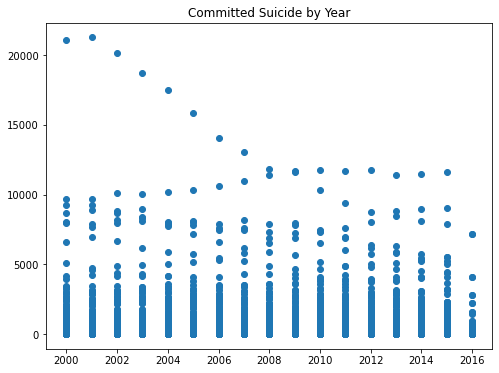

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(x=cleaned_df['year'], y=cleaned_df['suicides_no'])
plt.title('Committed Suicide by Year')
plt.show()

In [23]:
for year in cleaned_df['year'].unique():
    max_suicide = cleaned_df.loc[cleaned_df['year']==year]['suicides_no'].max()
    print(f'maximum of the year {year}: {max_suicide}',
          'in the country of {}'.format(cleaned_df.loc[cleaned_df['suicides_no']==max_suicide]['country'].unique()[0])
         )

maximum of the year 2000: 21063.0 in the country of Russian Federation
maximum of the year 2001: 21262.0 in the country of Russian Federation
maximum of the year 2002: 20119.0 in the country of Russian Federation
maximum of the year 2003: 18681.0 in the country of Russian Federation
maximum of the year 2004: 17465.0 in the country of Russian Federation
maximum of the year 2005: 15843.0 in the country of Russian Federation
maximum of the year 2006: 14020.0 in the country of Russian Federation
maximum of the year 2007: 13065.0 in the country of Russian Federation
maximum of the year 2008: 11848.0 in the country of Russian Federation
maximum of the year 2009: 11721.0 in the country of Russian Federation
maximum of the year 2012: 11763.0 in the country of United States of America
maximum of the year 2013: 11396.0 in the country of United States of America
maximum of the year 2014: 11455.0 in the country of United States of America
maximum of the year 2015: 11634.0 in the country of United 

After doing some research of suicide rates in countries, it became clear that the numbers for Russia are wrong.
I'm dropping the data of Russia

In [24]:
print(f'Before dropping Russia: {cleaned_df.shape}')
russia_indexes = cleaned_df.loc[cleaned_df['country']=='Russian Federation'].index
cleaned_df.drop(russia_indexes, inplace=True)
print(f'After dropping Russia{cleaned_df.shape}')

Before dropping Russia: (17760, 6)
After dropping Russia(17568, 6)


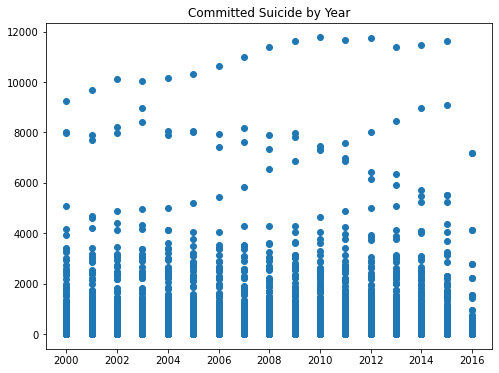

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(x=cleaned_df['year'], y=cleaned_df['suicides_no'])
plt.title('Committed Suicide by Year')
plt.show()

In [26]:
cleaned_df.loc[(cleaned_df['country'] == 'United States of America') & (cleaned_df['age']=='35-54 years')]

,country,year,sex,age,suicides_no,population
42170,United States of America,2000,female,35-54 years,2736.0000,41881451.0
42176,United States of America,2000,male,35-54 years,9263.0000,40945028.0
42182,United States of America,2001,female,35-54 years,2893.0000,42567863.0
42188,United States of America,2001,male,35-54 years,9684.0000,41638996.0
42194,United States of America,2002,female,35-54 years,3058.0000,42957716.0
42200,United States of America,2002,male,35-54 years,10101.0000,42042827.0
42206,United States of America,2003,female,35-54 years,3058.0000,42997878.0
42212,United States of America,2003,male,35-54 years,10025.0000,42177315.0
42218,United States of America,2004,female,35-54 years,3399.0000,43240905.0
42224,United States of America,2004,male,35-54 years,10145.0000,42486552.0


Everything looks ready for an analysis

### 10 countries with the highest suicide rates for different age groups

In [27]:
top_average_rate = []

for country in cleaned_df['country'].unique():
    for age_group in cleaned_df['age'].unique():
        temp = cleaned_df.loc[(cleaned_df['country']==country) &
                              (cleaned_df['age']==age_group)]
        top_average_rate.append([country, age_group, round(temp['suicides_no'].mean(), 6)])  # add it to the set to hold information


columns = ['country', 'age_group', 'average_suicide']
average_df = pd.DataFrame(top_average_rate, columns=columns)
print(average_df)

                  country    age_group  average_suicide
0     Antigua and Barbuda  15-24 years         0.000000
1     Antigua and Barbuda  25-34 years         0.000000
2     Antigua and Barbuda  35-54 years         0.178571
3     Antigua and Barbuda   5-14 years         0.000000
4     Antigua and Barbuda  55-74 years         0.142857
..                    ...          ...              ...
607  Virgin Islands (USA)  25-34 years         0.750000
608  Virgin Islands (USA)  35-54 years         1.428571
609  Virgin Islands (USA)   5-14 years         0.035714
610  Virgin Islands (USA)  55-74 years         0.607143
611  Virgin Islands (USA)    75+ years         0.250000

[612 rows x 3 columns]


                      country    age_group  average_suicide
582  United States of America  15-24 years       2226.03125
288                     Japan  15-24 years        890.43750
72                     Brazil  15-24 years        833.81250
360                    Mexico  15-24 years        694.03125
564                   Ukraine  15-24 years        506.00000
510                 Sri Lanka  15-24 years        449.90000
6                   Argentina  15-24 years        399.09375
258     Iran (Islamic Rep of)  15-24 years        397.00000
432         Republic of Korea  15-24 years        384.50000
294                Kazakhstan  15-24 years        368.96875


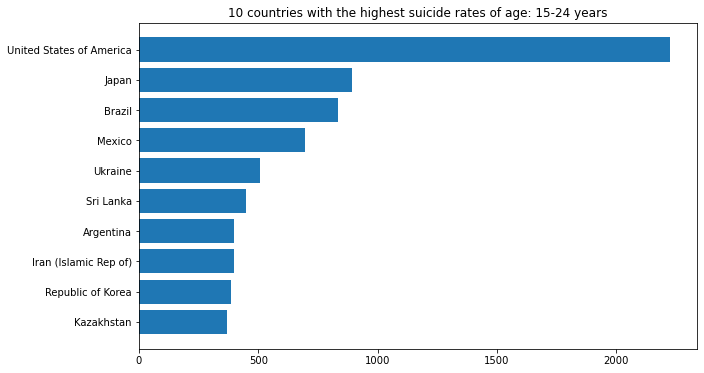


                      country    age_group  average_suicide
583  United States of America  25-34 years      2776.156250
289                     Japan  25-34 years      1752.000000
73                     Brazil  25-34 years      1015.906250
433         Republic of Korea  25-34 years       858.062500
565                   Ukraine  25-34 years       840.666667
361                    Mexico  25-34 years       574.187500
187                    France  25-34 years       552.633333
541                  Thailand  25-34 years       488.750000
295                Kazakhstan  25-34 years       475.250000
205                   Germany  25-34 years       473.781250


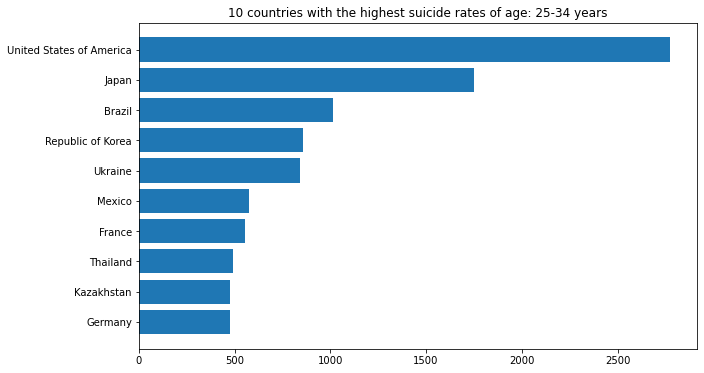


                      country    age_group  average_suicide
584  United States of America  35-54 years      7170.937500
290                     Japan  35-54 years      4790.750000
434         Republic of Korea  35-54 years      2287.906250
188                    France  35-54 years      2081.066667
566                   Ukraine  35-54 years      2010.033333
206                   Germany  35-54 years      1760.312500
74                     Brazil  35-54 years      1655.781250
416                    Poland  35-54 years      1258.718750
578            United Kingdom  35-54 years       938.218750
512                 Sri Lanka  35-54 years       836.700000


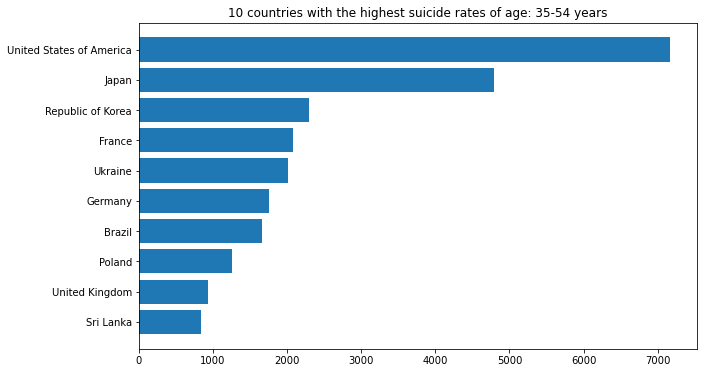


                      country   age_group  average_suicide
585  United States of America  5-14 years       145.468750
363                    Mexico  5-14 years        88.250000
75                     Brazil  5-14 years        56.937500
111                  Colombia  5-14 years        42.062500
297                Kazakhstan  5-14 years        37.468750
261     Iran (Islamic Rep of)  5-14 years        35.166667
597                Uzbekistan  5-14 years        34.750000
291                     Japan  5-14 years        33.281250
567                   Ukraine  5-14 years        30.533333
9                   Argentina  5-14 years        30.250000


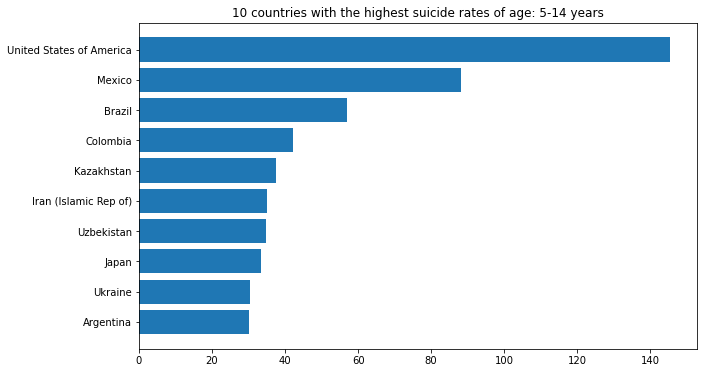


                      country    age_group  average_suicide
292                     Japan  55-74 years      5066.937500
586  United States of America  55-74 years      4106.781250
436         Republic of Korea  55-74 years      1755.593750
208                   Germany  55-74 years      1619.312500
568                   Ukraine  55-74 years      1376.600000
190                    France  55-74 years      1357.266667
418                    Poland  55-74 years       800.625000
76                     Brazil  55-74 years       763.000000
280                     Italy  55-74 years       620.812500
508                     Spain  55-74 years       470.468750


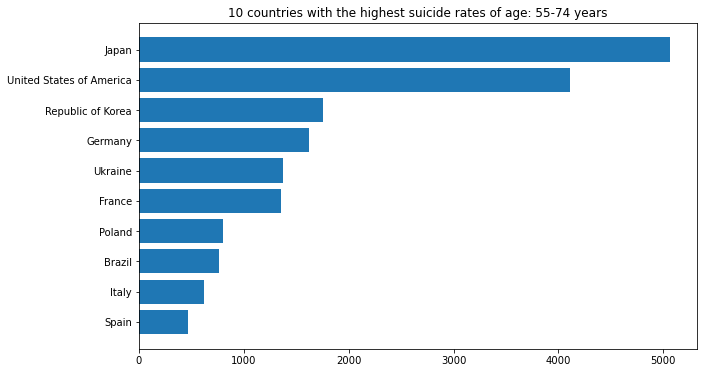


                      country  age_group  average_suicide
293                     Japan  75+ years      1844.875000
587  United States of America  75+ years      1559.437500
209                   Germany  75+ years       965.562500
191                    France  75+ years       886.700000
437         Republic of Korea  75+ years       781.156250
569                   Ukraine  75+ years       442.833333
281                     Italy  75+ years       387.156250
509                     Spain  75+ years       335.781250
77                     Brazil  75+ years       186.718750
251                   Hungary  75+ years       181.676471


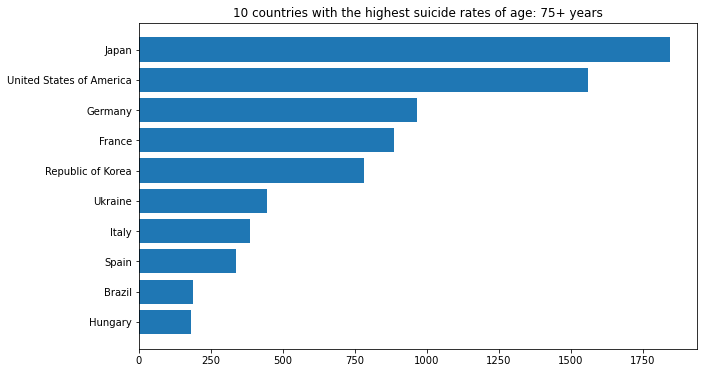

In [33]:
for age_group in average_df['age_group'].unique():
    topten = average_df.loc[average_df['age_group'] == age_group].sort_values(by=['average_suicide']).tail(10)
    print(average_df.loc[average_df['age_group'] == age_group].sort_values(by=['average_suicide'], ascending=False).head(10))
    plt.figure(figsize=(10,6))
    plt.barh(topten['country'], topten['average_suicide'])
    plt.title(f'10 countries with the highest suicide rates of age: {age_group}')
    plt.show()
    print()

U.S. and Japan are the first and second for the majority.
Ukraine, South Korea and Brazil are also consistenly in top 10.

By 

### 10 countries with the lowest suicide rates for different age groups

                          country    age_group  average_suicide
0             Antigua and Barbuda  15-24 years         0.000000
354                       Mayotte  15-24 years         0.000000
216                       Grenada  15-24 years         0.031250
48                       Barbados  15-24 years         0.035714
18                          Aruba  15-24 years         0.250000
330                      Maldives  15-24 years         0.300000
606          Virgin Islands (USA)  15-24 years         0.357143
474                    Seychelles  15-24 years         0.366667
78              Brunei Darussalam  15-24 years         0.375000
462  Saint Vincent and Grenadines  15-24 years         0.500000


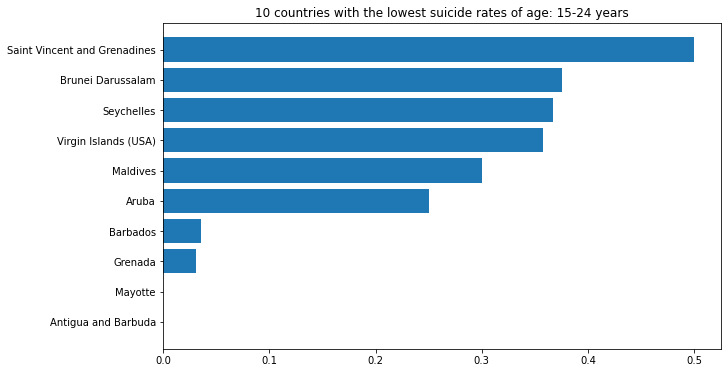


                          country    age_group  average_suicide
1             Antigua and Barbuda  25-34 years         0.000000
217                       Grenada  25-34 years         0.156250
49                       Barbados  25-34 years         0.214286
355                       Mayotte  25-34 years         0.250000
331                      Maldives  25-34 years         0.250000
37                        Bahamas  25-34 years         0.357143
475                    Seychelles  25-34 years         0.600000
463  Saint Vincent and Grenadines  25-34 years         0.656250
19                          Aruba  25-34 years         0.656250
607          Virgin Islands (USA)  25-34 years         0.750000


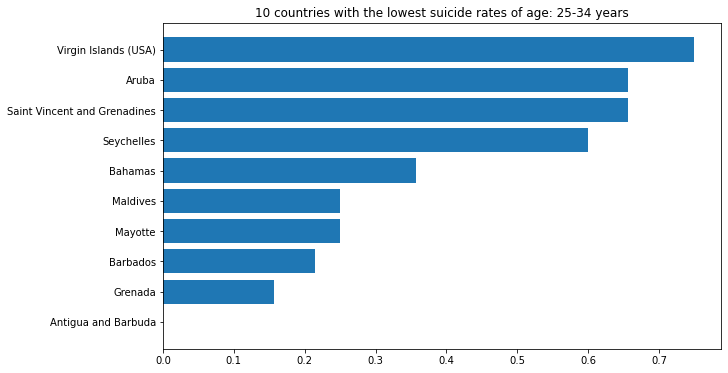


                          country    age_group  average_suicide
218                       Grenada  35-54 years         0.156250
2             Antigua and Barbuda  35-54 years         0.178571
332                      Maldives  35-54 years         0.300000
356                       Mayotte  35-54 years         0.375000
50                       Barbados  35-54 years         0.785714
464  Saint Vincent and Grenadines  35-54 years         1.031250
38                        Bahamas  35-54 years         1.035714
80              Brunei Darussalam  35-54 years         1.125000
476                    Seychelles  35-54 years         1.366667
20                          Aruba  35-54 years         1.375000


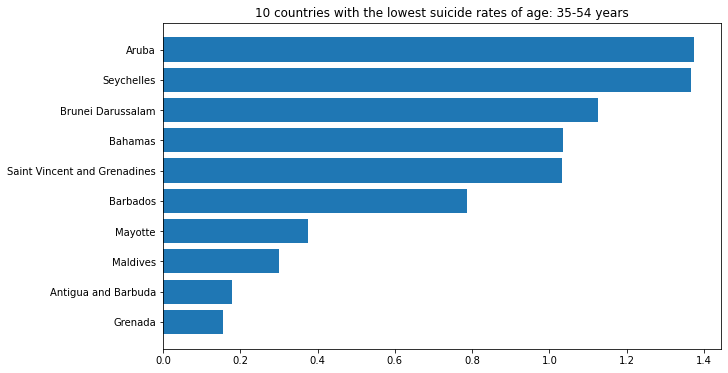


                  country   age_group  average_suicide
3     Antigua and Barbuda  5-14 years         0.000000
399                  Oman  5-14 years         0.000000
357               Mayotte  5-14 years         0.000000
219               Grenada  5-14 years         0.000000
135                Cyprus  5-14 years         0.000000
51               Barbados  5-14 years         0.000000
21                  Aruba  5-14 years         0.031250
81      Brunei Darussalam  5-14 years         0.031250
477            Seychelles  5-14 years         0.033333
609  Virgin Islands (USA)  5-14 years         0.035714


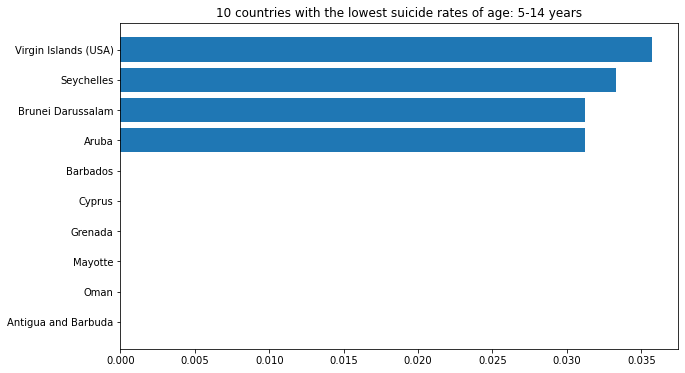


                          country    age_group  average_suicide
358                       Mayotte  55-74 years         0.000000
334                      Maldives  55-74 years         0.000000
82              Brunei Darussalam  55-74 years         0.062500
52                       Barbados  55-74 years         0.107143
4             Antigua and Barbuda  55-74 years         0.142857
466  Saint Vincent and Grenadines  55-74 years         0.187500
220                       Grenada  55-74 years         0.187500
40                        Bahamas  55-74 years         0.214286
400                          Oman  55-74 years         0.333333
478                    Seychelles  55-74 years         0.366667


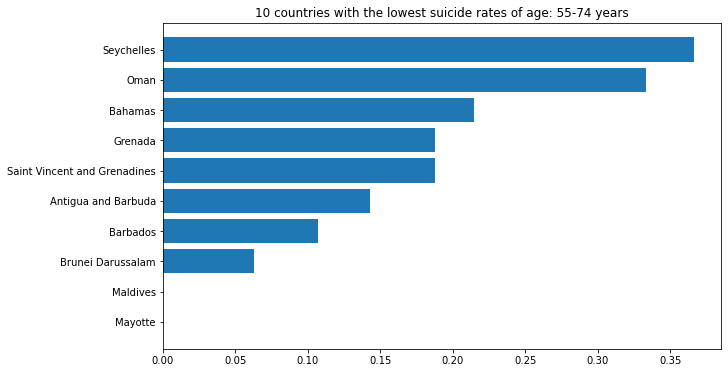


                  country  age_group  average_suicide
5     Antigua and Barbuda  75+ years         0.000000
47                Bahrain  75+ years         0.000000
305                Kuwait  75+ years         0.000000
221               Grenada  75+ years         0.031250
41                Bahamas  75+ years         0.035714
431                 Qatar  75+ years         0.035714
335              Maldives  75+ years         0.050000
83      Brunei Darussalam  75+ years         0.062500
53               Barbados  75+ years         0.071429
575  United Arab Emirates  75+ years         0.083333


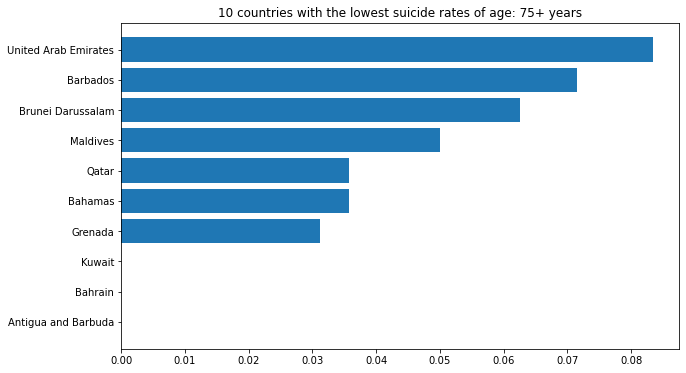

In [34]:
for age_group in average_df['age_group'].unique():
    bottomten = average_df.loc[average_df['age_group'] == age_group].sort_values(by=['average_suicide']).head(10)
    print(average_df.loc[average_df['age_group'] == age_group].sort_values(by=['average_suicide']).head(10))
    plt.figure(figsize=(10,6))
    plt.barh(bottomten['country'], bottomten['average_suicide'])
    plt.title(f'10 countries with the lowest suicide rates of age: {age_group}')
    plt.show()
    print()

The countries with the lowest average suicide were all in between 0 to 1, except for the age group of 35-54.
Antigua and Barbuda, Grenada, Barbados, and Brunei Darussalam recorded one of the lowest averages across all age groups.